### ⚠️ Always run this cell at the beginning ⚠️

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import re, os, glob
from functions import *
import seaborn as sns

# Export from Spec

### Exports all scans from the specs file

In [59]:
spec_files = glob.glob('**/*.spec', recursive=True)
for file_path in spec_files:
    directory = os.path.dirname(file_path)
    print (file_path)
    spec_contents = read_esrf_spec_file(file_path)

    for scan_number_to_save in spec_contents.keys():
        if scan_number_to_save in spec_contents:
            save_path = directory + f'/scan_{scan_number_to_save}'+'.dat'
            save_scan_to_ascii(spec_contents[scan_number_to_save], save_path)
            print(f"Scan {scan_number_to_save} saved to {save_path}")
        else:
            print(f"Scan number {scan_number_to_save} not found in the file.")


S1_Cu_6Sm/004_Cu-6Sm_Activation_CD/2024-07-24_004_Cu-6Sm_Activation_CD.spec
Scan 1 saved to S1_Cu_6Sm/004_Cu-6Sm_Activation_CD/scan_1.dat
Scan 2 saved to S1_Cu_6Sm/004_Cu-6Sm_Activation_CD/scan_2.dat
S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/2024-07-25_006_Cu-6Sm_Ramp_T1T2.spec
Scan 1 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_1.dat
Scan 2 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_2.dat
Scan 3 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_3.dat
Scan 4 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_4.dat
Scan 5 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_5.dat
Scan 6 saved to S1_Cu_6Sm/006_Cu-6Sm_Ramp_T1T2/scan_6.dat
S1_Cu_6Sm/015_Cu-6Sm_PM_RT/2024-07-25_015_Cu-6Sm_PM_RT.spec
Scan 1 saved to S1_Cu_6Sm/015_Cu-6Sm_PM_RT/scan_1.dat
Scan 2 saved to S1_Cu_6Sm/015_Cu-6Sm_PM_RT/scan_2.dat
Scan 3 saved to S1_Cu_6Sm/015_Cu-6Sm_PM_RT/scan_3.dat
Scan 4 saved to S1_Cu_6Sm/015_Cu-6Sm_PM_RT/scan_4.dat
Scan 5 saved to S1_Cu_6Sm/015_Cu-6Sm_PM_RT/scan_5.dat
Scan 6 saved to S1_Cu_6Sm/015_Cu-6Sm_PM_RT/scan_6.dat


# Merge selected scans

### Merge all the scans around the same edge and condition

S7-NiFe-6Sm/002_S7-NiFe-6Sm_Activation/scan_12.dat roi5
S7-NiFe-6Sm/002_S7-NiFe-6Sm_Activation/scan_12.dat mcaLt
7.132
S7-NiFe-6Sm/002_S7-NiFe-6Sm_Activation/scan_13.dat roi5
S7-NiFe-6Sm/002_S7-NiFe-6Sm_Activation/scan_13.dat mcaLt
outlier -   - 40 0.014786755
   monoE  roi5_mean  roi5_std  mcaLt_mean  mcaLt_std  roi5/mcaLt_mean  \
0  7.062      261.0       NaN    1.888929        NaN       138.173566   
1  7.064      238.0       NaN    1.901078        NaN       125.192121   
2  7.066      264.0       NaN    1.890667        NaN       139.633269   
3  7.068      281.0       NaN    1.886981        NaN       148.915111   
4  7.070      273.0       NaN    1.903275        NaN       143.436955   

   roi5/mcaLt_std  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


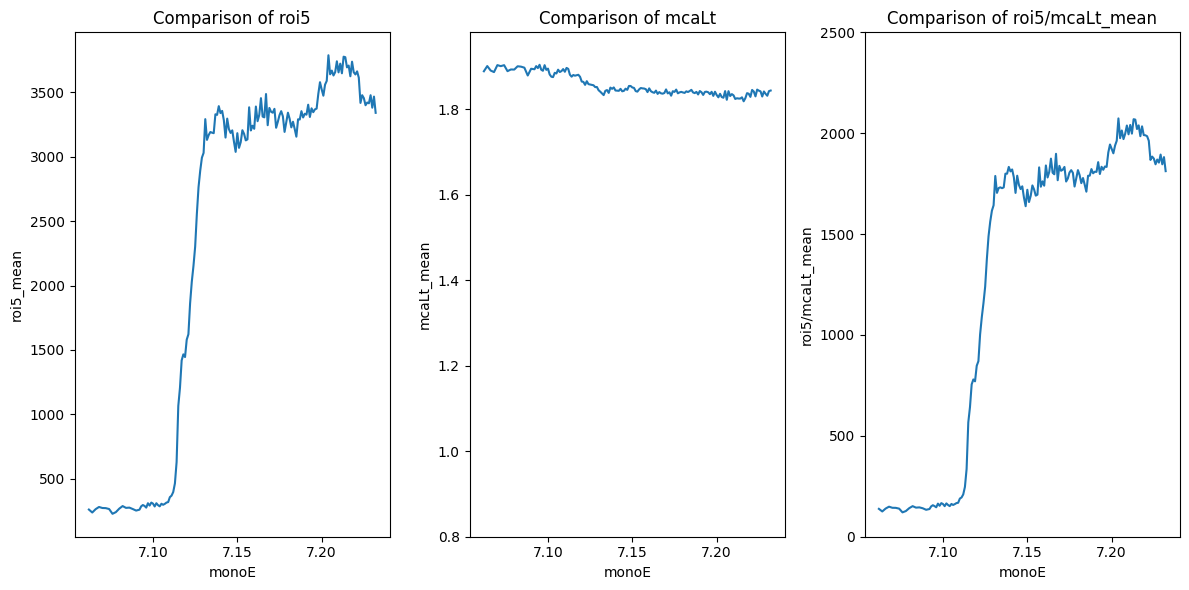

In [2]:
#########################################
# # use the Sample name and the Condition
sample_folder_path = "S7-NiFe-6Sm"
state_folder_path = "002_S7-NiFe-6Sm_Activation"
suffix = "Fe_NEXAFS"

#########################################
# list the scan numbers of the files you wan to export (and the corresponding edge type)
first_scan = 12
last_scan = 13

#########################################
# list the variables you want to plot (var and normalization)
var1= "roi5" # "ionch1"  #"roi4"
var2= "mcaLt" #"mcaRt" #"mcaLt"
#########################################
#########################################

folder_path = os.path.join(sample_folder_path, state_folder_path)
scan_numbers = list(range(first_scan, last_scan + 1))
scan_files = [os.path.join(folder_path, f"scan_{n}.dat") for n in scan_numbers]

file_dict = group_files_by_start(scan_files)

# Make sure this function returns exactly two DataFrames
#result_df = process_files(file_dict, var1, var2)
result_df = process_files_no_spikes(file_dict, var1, var2, threshold = 0.1)
#result_df, combined_data = process_files(file_dict, var1, var2)
print(result_df.head(5))

# Save the result DataFrame to a CSV file
filename_df = f"Data_{suffix}_merged_scans_{scan_numbers[0]}_{scan_numbers[-1]}.csv"
result_df.to_csv(os.path.join(folder_path, filename_df), index=False)

# Plot original and modified data for comparison
plt.figure(figsize=(12, 6))

# Plot var1
plt.subplot(1, 3, 1)
sns.lineplot(x='monoE', y="roi5_mean", data=result_df )
#sns.boxplot(x='monoE', y="roi5_mean", hue='source', data=result_df )
plt.title(f'Comparison of {var1}')
plt.ylabel("roi5_mean")

# Plot var2
plt.subplot(1, 3, 2)
sns.lineplot(x='monoE', y="mcaLt_mean", data=result_df )
#sns.boxplot(x='monoE', y="mcaLt_mean", hue='source', data=result_df )
plt.ylim(0.8,1.98)
plt.title(f'Comparison of {var2}')
plt.ylabel("mcaLt_mean")

# Plot var3
plt.subplot(1, 3, 3)
sns.lineplot(x='monoE', y="roi5/mcaLt_mean", data=result_df )
#sns.boxplot(x='monoE', y="roi5/mcaLt_mean", hue='source', data=result_df )
plt.title(f'Comparison of roi5/mcaLt_mean')
plt.ylabel("roi5/mcaLt_mean")
plt.ylim(0,2500)
plt.tight_layout()
plt.show()

#folder_path = sample_folder_path + "/" + state_folder_path + "/"
#scan_numbers = list(range(first_scan, last_scan + 1))
##scan_numbers =[16,17,18,19,20, 22,23]
#scan_files = [os.path.join(folder_path, f"scan_{n}.dat") for n in scan_numbers]

#file_dict = group_files_by_start(scan_files)
#result_df = process_files(file_dict, var1, var2)

#filename_df = f"Data_{suffix}_merged_scans_{scan_numbers[0]}_{scan_numbers[-1]}.csv"
#result_df.to_csv(folder_path + filename_df, index=False)

# Plot data

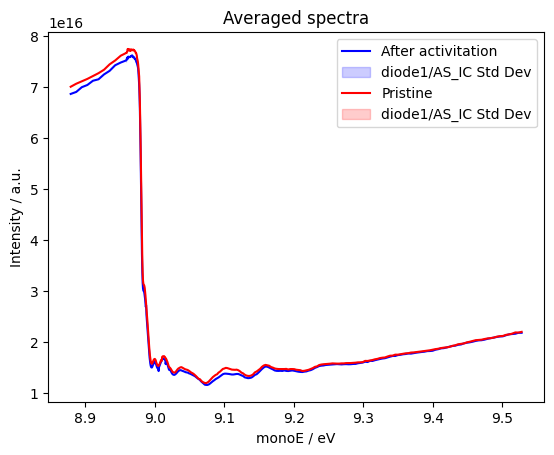

In [ ]:
#### This is an example ########################

#change here the file you want to plot
file_to_plot ="S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/Data_Cu_K_EXAFS_merged_scans_4_7.csv"
# and the variables you want to plot
var1="diode1"
var2="AS_IC"

#################################################
result_df = pd.read_csv(file_to_plot)

plt.plot(result_df['monoE'], result_df[f'{var1}/{var2}_mean'], label="After activitation", color='blue')
plt.fill_between(result_df['monoE'],
                 result_df[f'{var1}/{var2}_mean'] - result_df[f'{var1}/{var2}_std'],
                 result_df[f'{var1}/{var2}_mean'] + result_df[f'{var1}/{var2}_std'],
                 color='blue', alpha=0.2, label=f'{var1}/{var2} Std Dev')


#change here the file you want to plot
file_to_plot ="S1_Cu_6Sm/003_Cu-6Sm_Activation_dwell/Data_Cu_K_EXAFS_merged_scans_17_20.csv"
# and the variables you want to plot
var1="diode1"
var2="AS_IC"

result_df = pd.read_csv(file_to_plot)

plt.plot(result_df['monoE'], result_df[f'{var1}/{var2}_mean'], label="Pristine", color='red')
plt.fill_between(result_df['monoE'],
                 result_df[f'{var1}/{var2}_mean'] - result_df[f'{var1}/{var2}_std'],
                 result_df[f'{var1}/{var2}_mean'] + result_df[f'{var1}/{var2}_std'],
                 color='red', alpha=0.2, label=f'{var1}/{var2} Std Dev')

plt.xlabel('monoE / eV')
plt.ylabel('Intensity / a.u.')
plt.title('Averaged spectra')
plt.legend()

plt.show()